<a href="https://colab.research.google.com/github/FranciniSantana/Data-Analysis-With-Python-FreeCodeCamp/blob/main/Projeto_Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Medical Data Visualizer


*Preparação do ambiente*
## Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import plotly.express as pl
import plotly.graph_objects as go
from scipy.stats import variation,skew,kurtosis


## Dicionário de Dados

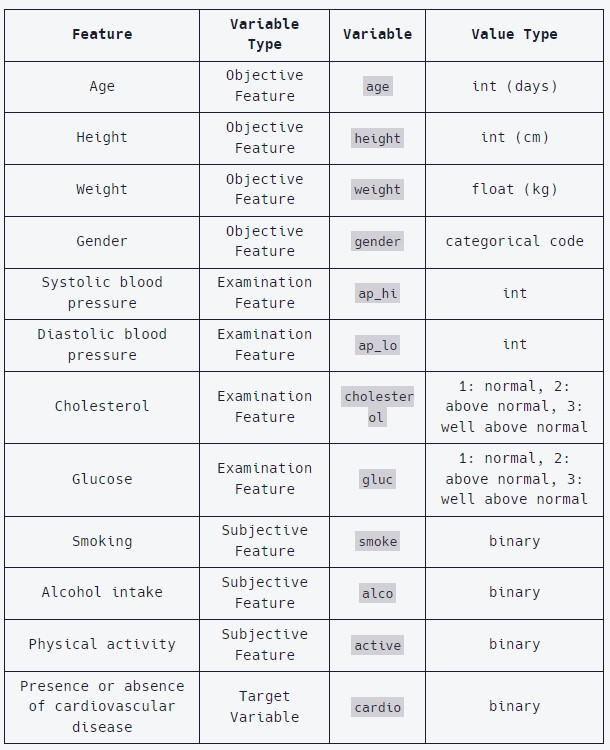

## Lendo os dados 

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Bases/medical_examination.csv')

In [5]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Análise exploratória +  Data wrangling


In [6]:
df.shape #qual o tamanho da minha tabela em linhas e colunas

(70000, 13)

In [7]:
df.info() #informações sobre tipo de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.isnull().sum() #verificando se possui valores nulos

id             0
age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
df['id'].duplicated().sum() #verificando se possui valores duplicados

0

In [10]:
df.describe() #medidas estatísticas da tabela

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['age_years'] = (df['age'] / 365).round(decimals=0).astype(int) # incluindo colunas age em anos
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [12]:
df['age_years'].describe() # entendendo estatísticas da idade mínimma

count    70000.000000
mean        53.338686
std          6.765294
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

In [13]:
df['height_meters'] = (df['height'] / 100).round(decimals=2) # criando coluna de conversão de altura de cm p/  metros
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1.68
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,1.56
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,1.65
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1.69
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,1.68
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,1.58
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,1.83
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,1.63


**1. Add an overweight column to the data.**

To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [14]:
overweight = df.weight / (df.height_meters ** 2)
df['overweight'] = overweight
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,1.56,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,1.68,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,1.58,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,1.83,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,1.63,27.099251


In [15]:
 df['is_overweight'] = np.where(df['overweight'] > 25,1,0)
 df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters,overweight,is_overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53,1.68,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62,1.58,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,1.83,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,1.63,27.099251,1


**2. Normalize the data by making 0 always good and 1 always bad.**

If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [16]:
df2 = df.copy() #fazendo uma cópia apenas para testar se vai dar certo o código abaixo

In [17]:
df2[['cholesterol','gluc']] = np.where(df2[['cholesterol','gluc']] == 1,0,1)

In [18]:
print('cholesterol\n',df2['cholesterol'].value_counts())
print('gluc:\n', df2['gluc'].value_counts())

cholesterol
 0    52385
1    17615
Name: cholesterol, dtype: int64
gluc:
 0    59479
1    10521
Name: gluc, dtype: int64


In [19]:
df.corr() # avaliando a correlação

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters,overweight,is_overweight
id,1.000000,0.003457,0.003154,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050,-0.003038,-0.001377,-0.000832
age,0.003457,1.000000,-0.022609,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090,-0.081515,0.085512,0.092118
sex,0.003154,-0.022609,1.000000,0.498221,0.155115,0.005985,0.015195,-0.035833,-0.020698,0.337664,0.170682,0.005991,0.007953,-0.022818,0.498221,-0.096409,-0.040700
height,-0.003038,-0.081515,0.498221,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456,1.000000,-0.290642,-0.115871
weight,-0.001830,0.053684,0.155115,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661,0.290968,0.762009,0.616120
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793,0.005488,0.024852,0.021255
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754,0.006150,0.035345,0.030235
cholesterol,0.006106,0.154424,-0.035833,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386,-0.050226,0.146270,0.131507
gluc,0.002467,0.098703,-0.020698,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596,-0.018595,0.101390,0.083699
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884,0.187989,-0.027215,-0.001314


In [20]:
df2[['cholesterol','gluc']] = np.where(df2[['cholesterol','gluc']] == 1,'bad','good')
df2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters,overweight,is_overweight
0,0,18393,2,168,62.0,110,80,good,good,0,0,1,0,50,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,bad,good,0,0,1,1,55,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,bad,good,0,0,0,1,52,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,good,good,0,0,1,1,48,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,good,good,0,0,0,0,48,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,good,good,1,0,1,0,53,1.68,26.927438,1
69996,99995,22601,1,158,126.0,140,90,bad,bad,0,0,1,1,62,1.58,50.472681,1
69997,99996,19066,2,183,105.0,180,90,bad,good,0,1,0,1,52,1.83,31.353579,1
69998,99998,22431,1,163,72.0,135,80,good,bad,0,0,0,1,61,1.63,27.099251,1


In [21]:
df2[['smoke','alco','active','cardio','is_overweight']] = np.where(df2[['smoke','alco','active','cardio','is_overweight']] == 1,'bad','good')


In [22]:
df2

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters,overweight,is_overweight
0,0,18393,2,168,62.0,110,80,good,good,good,good,bad,good,50,1.68,21.967120,good
1,1,20228,1,156,85.0,140,90,bad,good,good,good,bad,bad,55,1.56,34.927679,bad
2,2,18857,1,165,64.0,130,70,bad,good,good,good,good,bad,52,1.65,23.507805,good
3,3,17623,2,169,82.0,150,100,good,good,good,good,bad,bad,48,1.69,28.710479,bad
4,4,17474,1,156,56.0,100,60,good,good,good,good,good,good,48,1.56,23.011177,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,good,good,bad,good,bad,good,53,1.68,26.927438,bad
69996,99995,22601,1,158,126.0,140,90,bad,bad,good,good,bad,bad,62,1.58,50.472681,bad
69997,99996,19066,2,183,105.0,180,90,bad,good,good,bad,good,bad,52,1.83,31.353579,bad
69998,99998,22431,1,163,72.0,135,80,good,bad,good,good,good,bad,61,1.63,27.099251,bad


**3. Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot().**

The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.

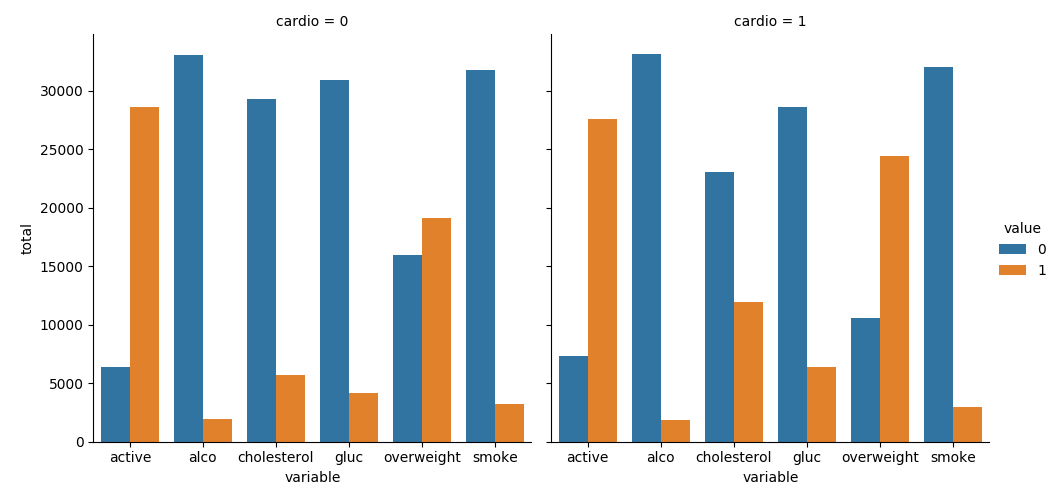

In [23]:
df2.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'height_meters', 'overweight', 'is_overweight'],
      dtype='object')

In [24]:
df2[['alco']].value_counts()

alco
good    66236
bad      3764
dtype: int64

In [25]:
df_grouped = df2[['cardio','active','alco','cholesterol','is_overweight','smoke', ]].groupby('cardio').count().reset_index()
df_grouped

,cardio,active,alco,cholesterol,is_overweight,smoke
0,bad,34979,34979,34979,34979,34979
1,good,35021,35021,35021,35021,35021


In [26]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cardio         2 non-null      object
 1   active         2 non-null      int64 
 2   alco           2 non-null      int64 
 3   cholesterol    2 non-null      int64 
 4   is_overweight  2 non-null      int64 
 5   smoke          2 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 224.0+ bytes


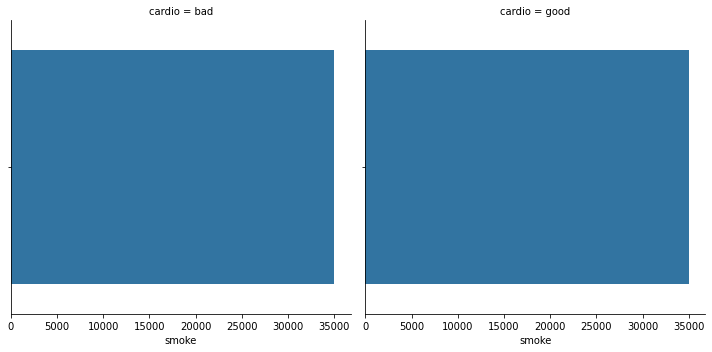

In [27]:
sns.catplot(data= df_grouped, x= 'smoke',  col = 'cardio',kind= 'bar')

In [28]:
df_grouped2 = df_grouped.transpose().reset_index()



In [29]:
df_grouped2.columns = df_grouped2.iloc[0]
df_grouped2 = df_grouped2.iloc[1:]
df_grouped2


,cardio,bad,good
1,active,34979,35021
2,alco,34979,35021
3,cholesterol,34979,35021
4,is_overweight,34979,35021
5,smoke,34979,35021


In [30]:
df_grouped2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cardio  5 non-null      object
 1   bad     5 non-null      object
 2   good    5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


**4. Clean the data. Filter out the following patient segments that represent incorrect data**

a) diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

b) height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

c) height is more than the 97.5th percentile

d) weight is less than the 2.5th percentile

e) weight is more than the 97.5th percentile


In [32]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,height_meters,overweight,is_overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,1.56,23.011177,0


In [37]:
df['id'][df['ap_lo'] > df['ap_hi']].count() # contar quantas linhas temos com elementos onde a pressão diastólica é maior que a sistólica

1234

In [50]:
df['height'].quantile(0.025)

150.0

In [51]:
df[df['height'] < (df['height'].quantile(0.025))].count() #contar quantas linhas possuem altura menor que 2,5% dos dados

id               1537
age              1537
sex              1537
height           1537
weight           1537
ap_hi            1537
ap_lo            1537
cholesterol      1537
gluc             1537
smoke            1537
alco             1537
active           1537
cardio           1537
age_years        1537
height_meters    1537
overweight       1537
is_overweight    1537
dtype: int64

In [52]:
df['height'].quantile(0.975) # quartil 97,5 é 154

180.0

In [48]:
df['height'].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [56]:
df[ df['height'] > (df['height'].quantile(0.975))].count() # contar quantas linhas possuem  altura maior que 97,5% percentil

id               1439
age              1439
sex              1439
height           1439
weight           1439
ap_hi            1439
ap_lo            1439
cholesterol      1439
gluc             1439
smoke            1439
alco             1439
active           1439
cardio           1439
age_years        1439
height_meters    1439
overweight       1439
is_overweight    1439
dtype: int64

## Conclusão
